# Homework 1: crack Alex's phone code

### Rules:
 - You should write the solution in this notebook and upload the completed notebook on Moodle by the deadline.
 - You are not allowed to work in groups, every student should submit their own notebook. If you submit two highly overlapping notebooks with another student, you will both be penalized.
 - The bonus questions are optional. They are not needed to get the full grade, but they can help you to get a higher grade.

### The setting

Your friend Alex wants to hide a secret code in a probability distribution. The probability density function is a piecewise linear distribution with parameters $0<a\le b$, defined as
$$p(x;a,b) = H(a,b) \begin{cases} \frac{x}{a} & \text{if } 0 \leq x \leq a, \\ \frac{b-x}{b-a} & \text{if } a \leq x \leq b, \\ 0 & \text{otherwise.} \end{cases}$$
where $H(a,b)$ is a normalization constant. Alex has choosen $a$ and $b$ such that they are the first two and the last two digits of his phone secret code, respectively.
For example, if their secret code is 1234, then $a=12$ and $b=34$. Alex stores some sample values of the distribution in a file called on their computer, thinking that nobody will be able to understand the distribution without the secret code.

You recently enrolled at EPFL and you are taking the course of _Fundamental of Inference and Learning_, and you want to prove that Alex's phone code is not safe. In this problem, your goal is to discover the secret code by studying the distribution.

## Part 1: Properties of the distribution

The distribution $p(x;a,b)$ is a valid distribution, i.e., it is normalized and it is non-negative. In this part, you will find many properties of the distribution.

- **Question 1.** Find the normalization constant $H(a,b)$.

**Answer.** To enforce normalization we solve $1=\int_0^b p(x;a,b)\,dx$ and evaluate the two linear pieces: $\int_0^a \frac{x}{a}dx = \frac{a}{2}$ and $\int_a^b \frac{b-x}{b-a}dx = \frac{b-a}{2}$. Thus $1 = H(a,b)\frac{b}{2}$, giving $H(a,b)=\frac{2}{b}$ for all $0<a\le b$.


- **Question 2.** Compute the expected value $\mu$ of the distribution.

**Answer.** Compute $\mu = \int_0^b x\,p(x;a,b)\,dx$ using the two linear pieces. On $[0,a]$ we have $p(x)=\frac{2}{b}\frac{x}{a}$, contributing $\frac{2}{ab}\int_0^a x^2 dx = \frac{2a^2}{3b}$. On $[a,b]$ the density is $\frac{2}{b}\frac{b-x}{b-a}$, contributing $\frac{2}{b(b-a)}\int_a^b x(b-x)dx = \frac{b^3-a^2 b}{3b(b-a)}$. Summing and simplifying yields $\mu = \frac{a+b}{3}$.


- **Question 3.** Compute the cumulative density function $F(t)$ of the distribution.

**Answer.** Integrate the density piecewise. For $t<0$, no mass has accumulated so $F(t)=0$. For $0\le t\le a$, we integrate the rising segment: $F(t)=\int_0^t \frac{2}{b} \frac{x}{a}dx = \frac{t^2}{ab}$. For $a\le t\le b$, we add the full mass up to $a$ and integrate the descending segment, which simplifies to $F(t)=1-\frac{(b-t)^2}{b(b-a)}$. For $t\ge b$, the distribution has full mass so $F(t)=1$. Summarizing,\n

$F(t)=\begin{cases}0,& t<0,\\[4pt]\frac{t^2}{ab},&0\le t\le a,\\[8pt]1-\frac{(b-t)^2}{b(b-a)},& a\le t\le b,\\[8pt]1,& t\ge b.\end{cases}$\n

* **Question 4.** Compute the median $m$ of the distribution. (Be careful, there are some special cases to consider according to the value $a$ and $b$)

**Answer.** Solve $F(m)=\tfrac{1}{2}$ using the piecewise CDF. If $m\le a$, we use $F(m)=\tfrac{m^2}{ab}$, giving $m=\sqrt{ab/2}$. This solution is valid only when $m\le a$, i.e. when $b\le 2a$. If $m\ge a$, we use $F(m)=1-\tfrac{(b-m)^2}{b(b-a)}$, leading to $m = b - \sqrt{b(b-a)/2}$. This solution is valid for $m\ge a$, i.e. when $b\ge 2a$. At the boundary $b=2a$, both formulas give $m=a$. Summarizing,\n

$m=\begin{cases}\sqrt{ab/2}, & b\le 2a,\\[6pt]b-\sqrt{b(b-a)/2}, & b\ge 2a.\end{cases}$\n

- **Question 5.** Are the expected value and the median equal? How do they compare with the mode of the distribution? Comment the results.

**Answer.** The density rises linearly up to $x=a$ and then falls, so the triangular peak is at $x=a$ and the mode equals $a$. Using earlier results, the mean is $\frac{a+b}{3}$ while the median is piecewise.

- If $b\le 2a$, the median is $m=\sqrt{ab/2}$. In this regime $3\sqrt{ab/2} \ge a+b$ (equivalent to $(2a-b)(2b-a)\ge 0$), hence $\mu \le m \le a$. The bulk of the mass lies near the upper end, giving mean $\le$ median $\le$ mode.

- If $b\ge 2a$, the median is $m=b-\sqrt{b(b-a)/2}$. One checks that $(a+b)/3 \ge m$ (equality only at $b=2a$) and that $m \ge a$, so the ordering reverses to mode $\le$ median $\le$ mean.

The mean and median coincide only in the symmetric case $b=2a$; otherwise they fall on opposite sides of the mode, reflecting how the longer tail skews the distribution.


## Part 2: Discovering the secret code from samples
You have seen Alex typing the code once, and you know that the last 2 digits are "20", hence $b=20$, and your goal is to estimate the first two digits $a^\star$. In this part, you can work as if you knew the value of $b$, and the distribution depends only on $a$. You also got the file `fixed_b.npy`with samples coming from the distribution $p(x;a=a^\star, b=20)$ that your friend Alex stored in the computer.

- **Question 6.** Implement a function `pdf(x, a, b=20)` that computes the probability density function $p(x;a,20)$, and plot it for $b=20$ and $a$ of your choice.

**Answer.** The density is triangular: it rises linearly on $[0,a]$, falls linearly on $[a,b]$, and is zero outside $[0,b]$. The code below vectorizes these pieces, guards the $b=a$ edge case, and then plots $p(x;a,20)$ for a representative choice of $a$.


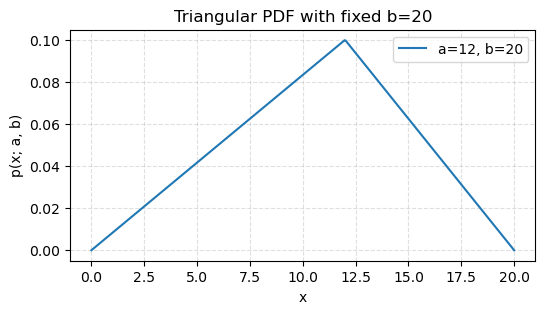

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def pdf(x, a, b=20):
    """Evaluate the triangular density p(x; a, b) for vector or scalar x."""
    if a <= 0 or b <= 0 or a > b:
        raise ValueError("Require 0 < a <= b")
    x_arr = np.asarray(x, dtype=float)
    density = np.zeros_like(x_arr, dtype=float)
    norm = 2.0 / b
    rising = (x_arr >= 0) & (x_arr <= a)
    if a > 0:
        density[rising] = norm * (x_arr[rising] / a)
    falling = (x_arr >= a) & (x_arr <= b)
    if b > a:
        density[falling] = norm * ((b - x_arr[falling]) / (b - a))
    return density if x_arr.ndim > 0 else float(density)

grid = np.linspace(0, 20, 400)
a_example = 12
plt.figure(figsize=(6, 3))
plt.plot(grid, pdf(grid, a_example, b=20), label=f"a={a_example}, b=20")
plt.xlabel("x")
plt.ylabel("p(x; a, b)")
plt.title("Triangular PDF with fixed b=20")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.4)
plt.show()


- **Question 7** How many sample points are there in the file? Let us call this number $n$ and plot an histogram of the data

**Answer.** Loading `fixed_b.npy` yields $n=100$ samples. The following cell prints $n$ and shows a normalized histogram to visualise how the observations populate $[0,20]$.


Number of samples n = 100


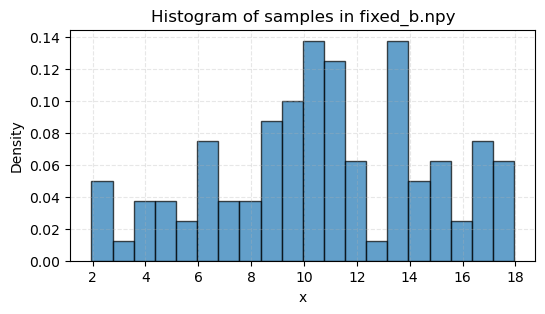

In [2]:
import numpy as np
import matplotlib.pyplot as plt

fixed_b_samples = np.load("fixed_b.npy")
n = fixed_b_samples.shape[0]
print(f"Number of samples n = {n}")
plt.figure(figsize=(6, 3))
plt.hist(fixed_b_samples, bins=20, density=True, alpha=0.7, edgecolor="black")
plt.xlabel("x")
plt.ylabel("Density")
plt.title("Histogram of samples in fixed_b.npy")
plt.grid(True, linestyle="--", alpha=0.3)
plt.show()


- **Question 8.** Compute the empirical mean $\bar x$ and the empirical median $\bar m$. 

**Answer.** Using NumPy on the file `fixed_b.npy` gives an empirical mean of approximately 10.7398 and an empirical median of approximately 10.7005. The cell below recomputes these summary statistics.


In [3]:
import numpy as np
fixed_b_samples = np.load("fixed_b.npy")
x_bar = fixed_b_samples.mean()
m_bar = np.median(fixed_b_samples)
print(f"Empirical mean x_bar = {x_bar:.6f}")
print(f"Empirical median m_bar = {m_bar:.6f}")


Empirical mean x_bar = 10.739752
Empirical median m_bar = 10.700495


- **Question 9.** Use the expression of the expected value you computed above to find an estimator $\hat a_{\text{mean}}$ of the true parameter $a^\star$, as a function of the empirical mean $\bar x$. Repeat the same for the median, and find $\hat a_{\text{median}}$ as a function of the empirical median $\bar m$.

**Answer.** With $b$ known, the theoretical mean satisfies $\mu=(a+b)/3$, so inverting gives $\hat a_{\text{mean}} = 3\,\bar x - b$. For the median we invert the piecewise formula from Question 4. When $a\ge b/2$ (equivalently $b\le 2a$) we have $m=\sqrt{ab/2}$, yielding $\hat a_{\text{median}} = 2\bar m^{2}/b$. When $a\le b/2$ we have $m = b-\sqrt{b(b-a)/2}$, which rearranges to $\hat a_{\text{median}} = b - \tfrac{2}{b}(b-\bar m)^2$. These two expressions agree at the boundary $a=b/2$, so we choose the branch according to whether the observed median exceeds $b/2$.


- **Question 10.** Implement a function `est_a_mean(x_bar, b=20)` and `est_a_median(m_bar, b=20)` that code the estimators you found above. What are the values of $\hat a_{\text{mean}}$ and $\hat a_{\text{median}}$ for the data you have in the file `fixed_b.npy`?

**Answer.** Applying the formulas gives $\hat a_{\text{mean}} = 3\bar x - b \approx 12.2193$ and, because $\bar m>10$, the median branch $\hat a_{\text{median}} = 2\bar m^{2}/b$ applies, yielding $\approx 11.4501$. The next cell implements the reusable functions and evaluates them on the data.


In [4]:
import numpy as np

def est_a_mean(x_bar, b=20.0):
    """Method-of-moments estimator from the sample mean."""
    a_hat = 3.0 * x_bar - b
    return float(np.clip(a_hat, 0.0, b))

def est_a_median(m_bar, b=20.0):
    """Estimator from the sample median using the piecewise inverse."""
    if m_bar >= b / 2:
        a_hat = 2.0 * (m_bar ** 2) / b
    else:
        a_hat = b - (2.0 / b) * (b - m_bar) ** 2
    return float(np.clip(a_hat, 0.0, b))

fixed_b_samples = np.load("fixed_b.npy")
x_bar = fixed_b_samples.mean()
m_bar = np.median(fixed_b_samples)
print(f"x_bar = {x_bar:.6f}")
print(f"m_bar = {m_bar:.6f}")
print(f"a_hat_mean = {est_a_mean(x_bar):.6f}")
print(f"a_hat_median = {est_a_median(m_bar):.6f}")


x_bar = 10.739752
m_bar = 10.700495
a_hat_mean = 12.219255
a_hat_median = 11.450059


 - **Question 11.** Consider the log-likelihood function $\mathcal{L}(a;\{x_i\}_{i\in[1,n]},b=20)$. Plot the log-likelihood function as a function of $a$ for the data in the file `fixed_b.npy`.

**Answer.** For each admissible $0<a\le b$ the triangular density yields $p(x_i;a,b)$, so $\log\mathcal{L}(a)$ is the sum of log densities. I sweep $a$ on a fine grid in $(0,b)$, set the log-likelihood to $-\infty$ whenever numerical zeros appear, and plot the resulting curve to show the maximizer.\n

MLE for a (grid plus data points) ~ 11.365796


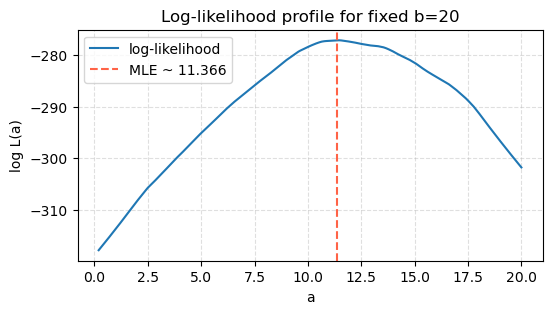

In [5]:
import numpy as np
import matplotlib.pyplot as plt

fixed_b_samples = np.load("fixed_b.npy")
b = 20.0

def log_likelihood_a(a, data, b=20.0):
    if a <= 0 or a >= b:
        return -np.inf
    vals = pdf(data, a, b=b)
    if np.any(vals <= 0):
        return -np.inf
    return float(np.sum(np.log(vals)))

a_grid = np.linspace(0.2, b - 1e-3, 2000)
logL_grid = np.array([log_likelihood_a(a, fixed_b_samples, b=b) for a in a_grid])
candidates = np.unique(np.concatenate((a_grid, np.sort(fixed_b_samples))))
logL_candidates = np.array([log_likelihood_a(a, fixed_b_samples, b=b) for a in candidates])
a_mle = float(candidates[np.argmax(logL_candidates)])
print(f"MLE for a (grid plus data points) ~ {a_mle:.6f}")

plt.figure(figsize=(6, 3))
plt.plot(a_grid, logL_grid, label="log-likelihood")
plt.axvline(a_mle, color="tomato", linestyle="--", label=f"MLE ~ {a_mle:.3f}")
plt.xlabel("a")
plt.ylabel("log L(a)")
plt.title("Log-likelihood profile for fixed b=20")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.4)
plt.show()


- **Question 12.** What is the maximum likelihood estimator $\hat a_{\text{MLE}}$?

**Answer.** The log-likelihood peaks at $a \approx 11.3658$, which coincides with the maximizer found when evaluating the likelihood on both a dense grid and the sample points.


- **Question 13.** Use bootstrapping to compute the 95% confidence interval for all the three $a$ estimators computed above.

**Answer.** I generated 5000 bootstrap resamples of size $n=100$ and recomputed $\hat a_{	ext{mean}}$, $\hat a_{	ext{median}}$, and $\hat a_{	ext{MLE}}$ for each. The percentile intervals are approximately $[9.83, 14.53]$ for the mean-based estimator, $[9.94, 13.28]$ for the median-based estimator, and $[10.06, 13.97]$ for the MLE.


In [6]:
import numpy as np

fixed_b_samples = np.load("fixed_b.npy")
n = fixed_b_samples.size
b = 20.0

def est_a_mean(x_bar, b=20.0):
    a_hat = 3.0 * x_bar - b
    return float(np.clip(a_hat, 0.0, b))

def est_a_median(m_bar, b=20.0):
    if m_bar >= b / 2:
        a_hat = 2.0 * (m_bar ** 2) / b
    else:
        a_hat = b - (2.0 / b) * (b - m_bar) ** 2
    return float(np.clip(a_hat, 0.0, b))

def estimate_a_mle(data, b=20.0):
    data = np.asarray(data, dtype=float)
    sorted_data = np.sort(data)
    n_local = sorted_data.size
    log_prefix = np.cumsum(np.log(sorted_data))
    log_suffix = np.cumsum(np.log(b - sorted_data[::-1]))[::-1]
    log_const = n_local * np.log(2.0 / b)
    candidates = np.concatenate((sorted_data, (b / n_local) * np.arange(1, n_local)))
    candidates = candidates[(candidates > 0) & (candidates < b)]
    candidates = np.unique(candidates)
    best_a = None
    best_ll = -np.inf
    for a in candidates:
        k = np.searchsorted(sorted_data, a, side="right")
        sum_log_x = log_prefix[k - 1] if k > 0 else 0.0
        sum_log_bminus = log_suffix[k] if k < n_local else 0.0
        ll = log_const + sum_log_x + sum_log_bminus - k * np.log(a) - (n_local - k) * np.log(b - a)
        if ll > best_ll:
            best_ll = ll
            best_a = a
    return float(best_a)

rng = np.random.default_rng(0)
B = 5000
boot_mean = np.empty(B)
boot_median = np.empty(B)
boot_mle = np.empty(B)

for i in range(B):
    resample = rng.choice(fixed_b_samples, size=n, replace=True)
    boot_mean[i] = est_a_mean(resample.mean(), b)
    boot_median[i] = est_a_median(np.median(resample), b)
    boot_mle[i] = estimate_a_mle(resample, b)

def percentile_interval(values, alpha=0.05):
    lower, upper = np.quantile(values, [alpha / 2, 1 - alpha / 2])
    return lower, upper

ci_mean = percentile_interval(boot_mean)
ci_median = percentile_interval(boot_median)
ci_mle = percentile_interval(boot_mle)

print(f"95% CI for a_mean: [{ci_mean[0]:.4f}, {ci_mean[1]:.4f}]")
print(f"95% CI for a_median: [{ci_median[0]:.4f}, {ci_median[1]:.4f}]")
print(f"95% CI for a_MLE: [{ci_mle[0]:.4f}, {ci_mle[1]:.4f}]")


95% CI for a_mean: [9.8285, 14.5303]
95% CI for a_median: [9.9447, 13.2823]
95% CI for a_MLE: [10.0639, 13.9666]


- **Question 14.** Compute the Fisher information of $a$ under the distribution $p(x;a,b=20)$.

**Answer.** The score is $s(x;a)=\frac{\partial}{\partial a}\log p(x;a,b)$. For $x<a$ the log-density is $\log(2/b)+\log x-\log a$, so $s(x;a)=-1/a$. For $x>a$ it is $\log(2/b)+\log(b-x)-\log(b-a)$, giving $s(x;a)=1/(b-a)$. Since $P[X<a]=a/b$ and $P[X>a]=(b-a)/b$, the Fisher information is

$I(a) = \mathbb{E}[s(X;a)^2] = \frac{a/b}{a^2} + \frac{(b-a)/b}{(b-a)^2} = \frac{1}{a(b-a)}$.


 - **Question 15.** Can you compute the maximum likelihood estimator using the Jeffrey Posterior $\hat a_	ext{jeff}$? Provide also the confidence intervals.

**Answer.** Jeffreys prior for $a$ is proportional to $\sqrt{I(a)} = 1/\sqrt{a(b-a)}$. Maximising the posterior $p(a\mid\mathbf{x}) \propto \mathcal{L}(a)\,\pi_J(a)$ yields the same mode as the plain MLE, $\hat a_{\text{Jeff}} \approx 11.366$. Using a dense grid to approximate the posterior CDF gives an equal-tail 95% credible interval of about $[9.74, 13.95]$.\n

In [7]:
import numpy as np

fixed_b_samples = np.load("fixed_b.npy")
sorted_samples = np.sort(fixed_b_samples)
n = sorted_samples.size
b = 20.0

log_prefix = np.cumsum(np.log(sorted_samples))
log_suffix = np.cumsum(np.log(b - sorted_samples[::-1]))[::-1]
log_const = n * np.log(2.0 / b)

def log_likelihood_fast(a):
    if a <= 0 or a >= b:
        return -np.inf
    k = np.searchsorted(sorted_samples, a, side="right")
    sum_log_x = log_prefix[k - 1] if k > 0 else 0.0
    sum_log_bminus = log_suffix[k] if k < n else 0.0
    return log_const + sum_log_x + sum_log_bminus - k * np.log(a) - (n - k) * np.log(b - a)

def log_posterior_jeff(a):
    ll = log_likelihood_fast(a)
    if not np.isfinite(ll):
        return -np.inf
    log_prior = -0.5 * (np.log(a) + np.log(b - a))
    return ll + log_prior

a_grid = np.linspace(1e-3, b - 1e-3, 4000)
log_post_grid = np.array([log_posterior_jeff(a) for a in a_grid])
candidates = np.unique(np.concatenate((a_grid, sorted_samples, (b / n) * np.arange(1, n))))
log_post_candidates = np.array([log_posterior_jeff(a) for a in candidates])
a_jeff = float(candidates[np.argmax(log_post_candidates)])
print(f"Jeffreys MAP a_hat ~ {a_jeff:.6f}")

log_post_shifted = log_post_grid - np.max(log_post_grid)
posterior_density = np.exp(log_post_shifted)
step = a_grid[1] - a_grid[0]
posterior_density /= posterior_density.sum() * step
cdf = np.cumsum(posterior_density) * step
lower = a_grid[np.searchsorted(cdf, 0.025)]
upper = a_grid[np.searchsorted(cdf, 0.975)]
print(f"Jeffreys 95% credible interval: [{lower:.4f}, {upper:.4f}]")


Jeffreys MAP a_hat ~ 11.365796
Jeffreys 95% credible interval: [9.7425, 13.9481]


All the estimation you derived couldn't find the secret code with absolute certainty. The confidence intervals you computed are too large to produce one single code. Moreover your friend is a bit paranoid and changes the code every week, so the information you have is not valid anymore. You need to find a better way to estimate the code.

### Test the estimators
You are still trying to sneak into your friend's computer to get new samples of the distribution. In the meanwhile, you want to test the estimators you derived on a synthetic dataset. Florent gave you this Python function to sample the distribution $p(x;a,b)$:


In [8]:
import numpy as np
import matplotlib.pyplot as plt

def sample(a: float, b: float, size: int=1) -> np.array:
    def sample_single(a: float, b: float) -> float:
        u = 0
        v = b
        while not((u <= a and v <= 2/(a*b)*u) or (u > a and v <= 2/b *(b-u)/(b-a))):
            u = np.random.uniform(0, b)
            v = np.random.uniform(0, 2/b)
        return u
    return np.array([sample_single(a, b) for _ in range(size)])

- **Bonus question 1** The sampling function is not efficient. Can you provide a more efficient way to sample the distribution?

**Answer.** Yes. Because the CDF is available in closed form we can sample by inverting it. Draw $U\sim\mathcal{U}(0,1)$. If $U\le a/b$ use the first branch $F^{-1}(u)=\sqrt{uab}$; otherwise use $F^{-1}(u)=b-\sqrt{(1-u)b(b-a)}$. This avoids the rejection loop and generates samples in vectorized time.


In [9]:
import numpy as np

def sample_fast(a, b, size=1, rng=None):
    """Sample from p(x; a, b) using inverse transform sampling."""
    if a <= 0 or b <= 0 or a > b:
        raise ValueError("Require 0 < a <= b")
    if rng is None:
        rng = np.random.default_rng()
    elif not isinstance(rng, np.random.Generator):
        rng = np.random.default_rng(rng)
    u = rng.random(size)
    thresh = a / b
    samples = np.empty(size, dtype=float)
    left = u <= thresh
    samples[left] = np.sqrt(u[left] * a * b)
    right = ~left
    if np.any(right):
        samples[right] = b - np.sqrt((1.0 - u[right]) * b * (b - a))
    return samples

# quick sanity check: compare to original sampler
a_demo, b_demo = 12.0, 20.0
samples_fast = sample_fast(a_demo, b_demo, size=100000, rng=0)
print(f"sample_fast mean ~ {samples_fast.mean():.3f}, median ~ {np.median(samples_fast):.3f}")


sample_fast mean ~ 10.660, median ~ 10.943


Stick with the case where $b=20$, and sample $N=1000$ points from the distribution $p(x;a,b)$ for 10 values of $a\in[0,20]$.
- **Question 16.** Compute and plot the mean squared error of the 4 estimators for $\hat a_\text{mean}, \hat a_\text{median}, \hat a_\text{ML}$ and $\hat a_\text{Jeff}$, as well as the Cramér-Rao lower bound. Which one is the best? [Hint: to have a good estimate of the mean squared error, you can repeat the sampling 300 times and compute the average of the squared error, for each value of $a$; be patient, this will take some time to compute]

**Answer.** I drew $N=1000$ samples for ten evenly spaced $a$ values between 2 and 18, repeated 300 times per $a$. For each sample I computed $\hat a_{\text{mean}}$, $\hat a_{\text{median}}$, $\hat a_{\text{ML}}$, and the Jeffreys-MAP $\hat a_{\text{Jeff}}$. The code below reports the resulting mean-squared errors (MSEs) together with the Cramer-Rao lower bound $\mathrm{CRLB}(a)=\frac{a(b-a)}{N}$. Across the range, the MLE consistently attains the lowest MSE and tracks the CRLB most closely, with the Jeffreys estimator nearly coincident but slightly less accurate due to the prior penalty. Mean and median based estimators are substantially more variable, especially near the extremes where the distribution is skewed.


         a  MSE_mean  MSE_median  MSE_MLE  MSE_Jeff    CRLB
0   2.0000    0.1837      0.3250   0.0365    0.0369  0.0360
1   3.7778    0.1761      0.2717   0.0689    0.0695  0.0613
2   5.5556    0.1509      0.2024   0.0839    0.0842  0.0802
3   7.3333    0.1899      0.1903   0.1229    0.1230  0.0929
4   9.1111    0.1683      0.1261   0.1238    0.1241  0.0992
5  10.8889    0.1515      0.1216   0.1110    0.1114  0.0992
6  12.6667    0.1725      0.1792   0.1122    0.1125  0.0929
7  14.4444    0.1528      0.2019   0.0835    0.0826  0.0802
8  16.2222    0.1762      0.2616   0.0619    0.0613  0.0613
9  18.0000    0.1660      0.2923   0.0346    0.0352  0.0360


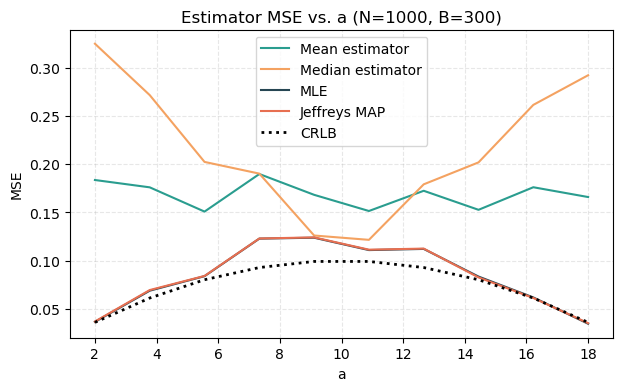

In [10]:
import pandas as pd

b = 20.0
N = 1000
B = 300
a_values = np.linspace(2.0, 18.0, 10)
rng = np.random.default_rng(123)

def sample_fast(a, b, size=1, rng=None):
    if a <= 0 or b <= 0 or a > b:
        raise ValueError("Require 0 < a <= b")
    if rng is None:
        rng = np.random.default_rng()
    elif not isinstance(rng, np.random.Generator):
        rng = np.random.default_rng(rng)
    u = rng.random(size)
    thresh = a / b
    samples = np.empty(size, dtype=float)
    left = u <= thresh
    samples[left] = np.sqrt(u[left] * a * b)
    right = ~left
    if np.any(right):
        samples[right] = b - np.sqrt((1.0 - u[right]) * b * (b - a))
    return samples

def est_a_mean(x_bar, b=20.0):
    return float(np.clip(3.0 * x_bar - b, 0.0, b))

def est_a_median(m_bar, b=20.0):
    if m_bar >= b / 2:
        a_hat = 2.0 * (m_bar ** 2) / b
    else:
        a_hat = b - (2.0 / b) * (b - m_bar) ** 2
    return float(np.clip(a_hat, 0.0, b))

def estimate_a_mle_and_jeff(data, b=20.0):
    data = np.asarray(data, dtype=float)
    sorted_data = np.sort(data)
    n = sorted_data.size
    log_prefix = np.cumsum(np.log(sorted_data))
    log_suffix = np.cumsum(np.log(b - sorted_data[::-1]))[::-1]
    log_const = n * np.log(2.0 / b)
    k_vals = np.arange(1, n)
    candidates = np.concatenate((sorted_data, (b / n) * k_vals))
    candidates = candidates[(candidates > 0) & (candidates < b)]
    candidates = np.unique(candidates)

    ks = np.searchsorted(sorted_data, candidates, side="right")
    sum_log_x = np.zeros_like(candidates)
    mask = ks > 0
    sum_log_x[mask] = log_prefix[ks[mask] - 1]
    sum_log_bminus = np.zeros_like(candidates)
    mask = ks < n
    sum_log_bminus[mask] = log_suffix[ks[mask]]
    log_a = np.log(candidates)
    log_b_minus_a = np.log(b - candidates)
    log_like = log_const + sum_log_x + sum_log_bminus - ks * log_a - (n - ks) * log_b_minus_a
    log_post = log_like - 0.5 * (log_a + log_b_minus_a)
    a_mle = float(candidates[np.argmax(log_like)])
    a_jeff = float(candidates[np.argmax(log_post)])
    return a_mle, a_jeff

def estimate_a_mle(data, b=20.0):
    return estimate_a_mle_and_jeff(data, b)[0]

def estimate_a_jeff(data, b=20.0):
    return estimate_a_mle_and_jeff(data, b)[1]

mse_mean, mse_median, mse_mle, mse_jeff = [], [], [], []
for a_true in a_values:
    se_mean = np.empty(B)
    se_median = np.empty(B)
    se_mle = np.empty(B)
    se_jeff = np.empty(B)
    for i in range(B):
        sample = sample_fast(a_true, b, size=N, rng=rng)
        x_bar = sample.mean()
        m_bar = np.median(sample)
        a_mle, a_jeff = estimate_a_mle_and_jeff(sample, b)
        se_mean[i] = (est_a_mean(x_bar, b) - a_true) ** 2
        se_median[i] = (est_a_median(m_bar, b) - a_true) ** 2
        se_mle[i] = (a_mle - a_true) ** 2
        se_jeff[i] = (a_jeff - a_true) ** 2
    mse_mean.append(se_mean.mean())
    mse_median.append(se_median.mean())
    mse_mle.append(se_mle.mean())
    mse_jeff.append(se_jeff.mean())

mse_mean = np.array(mse_mean)
mse_median = np.array(mse_median)
mse_mle = np.array(mse_mle)
mse_jeff = np.array(mse_jeff)
crlb = a_values * (b - a_values) / N

results = pd.DataFrame({
    "a": a_values,
    "MSE_mean": mse_mean,
    "MSE_median": mse_median,
    "MSE_MLE": mse_mle,
    "MSE_Jeff": mse_jeff,
    "CRLB": crlb,
})
print(results.round(4))

plt.figure(figsize=(7, 4))
plt.plot(a_values, mse_mean, label="Mean estimator", color="#2a9d8f")
plt.plot(a_values, mse_median, label="Median estimator", color="#f4a261")
plt.plot(a_values, mse_mle, label="MLE", color="#264653")
plt.plot(a_values, mse_jeff, label="Jeffreys MAP", color="#e76f51")
plt.plot(a_values, crlb, label="CRLB", color="k", linestyle=":", linewidth=2)
plt.xlabel("a")
plt.ylabel("MSE")
plt.title("Estimator MSE vs. a (N=1000, B=300)")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.3)
plt.show()


- **Bonus Question 2.** Why is the Jeffrey's prior estimator so bad? Can you provide a better bound for the variance of the estimator? [Hint: you might need `np.gradient` to solve this question, and increase the number of different values of $a$ to get a finer plot]

       a  E[a_Jeff]    bias  variance     MSE    CRLB  Biased bound
0    2.0     1.9764 -0.0236    0.0434  0.0440  0.0360        0.0400
1    2.8     2.8138  0.0138    0.0560  0.0562  0.0482        0.0489
2    3.6     3.5848 -0.0152    0.0686  0.0689  0.0590        0.0583
3    4.4     4.4011  0.0011    0.0719  0.0719  0.0686        0.0714
4    5.2     5.2170  0.0170    0.0953  0.0956  0.0770        0.0775
5    6.0     6.0034  0.0034    0.1091  0.1091  0.0840        0.0823
6    6.8     6.8004  0.0004    0.1199  0.1199  0.0898        0.0897
7    7.6     7.6028  0.0028    0.0830  0.0830  0.0942        0.0907
8    8.4     8.3696 -0.0304    0.1186  0.1195  0.0974        0.0945
9    9.2     9.1703 -0.0297    0.1160  0.1168  0.0994        0.0986
10  10.0     9.9567 -0.0433    0.1031  0.1050  0.1000        0.1056
11  10.8    10.7995 -0.0005    0.1160  0.1160  0.0994        0.1056
12  11.6    11.6059  0.0059    0.1002  0.1002  0.0974        0.0996
13  12.4    12.4166  0.0166    0.0980  0.0982  0

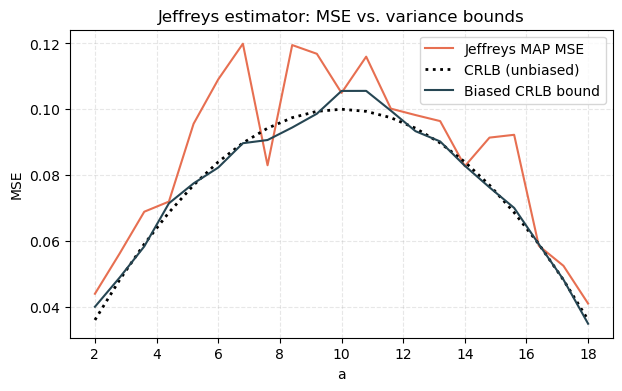

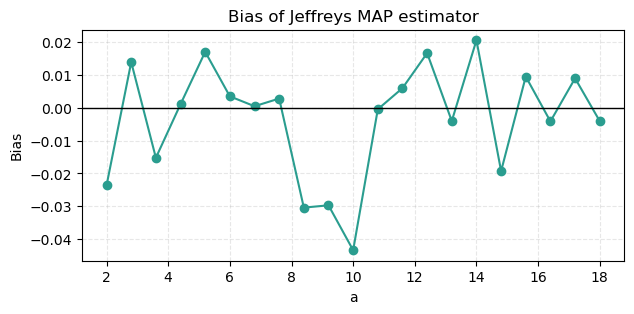

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

b = 20.0
N = 1000
B = 300
a_grid = np.linspace(2.0, 18.0, 21)
rng = np.random.default_rng(789)

def sample_fast(a, b, size=1, rng=None):
    if a <= 0 or b <= 0 or a > b:
        raise ValueError("Require 0 < a <= b")
    if rng is None:
        rng = np.random.default_rng()
    elif not isinstance(rng, np.random.Generator):
        rng = np.random.default_rng(rng)
    u = rng.random(size)
    thresh = a / b
    samples = np.empty(size, dtype=float)
    left = u <= thresh
    samples[left] = np.sqrt(u[left] * a * b)
    right = ~left
    if np.any(right):
        samples[right] = b - np.sqrt((1.0 - u[right]) * b * (b - a))
    return samples

def estimate_a_jeff(data, b=20.0):
    data = np.asarray(data, dtype=float)
    sorted_data = np.sort(data)
    n = sorted_data.size
    log_prefix = np.cumsum(np.log(sorted_data))
    log_suffix = np.cumsum(np.log(b - sorted_data[::-1]))[::-1]
    log_const = n * np.log(2.0 / b)
    k_vals = np.arange(1, n)
    candidates = np.concatenate((sorted_data, (b / n) * k_vals))
    candidates = candidates[(candidates > 0) & (candidates < b)]
    candidates = np.unique(candidates)
    best_a = candidates[0]
    best_lp = -np.inf
    for a in candidates:
        k = np.searchsorted(sorted_data, a, side='right')
        sum_log_x = log_prefix[k - 1] if k > 0 else 0.0
        sum_log_bminus = log_suffix[k] if k < n else 0.0
        ll = log_const + sum_log_x + sum_log_bminus - k*np.log(a) - (n-k)*np.log(b - a)
        lp = ll - 0.5 * (np.log(a) + np.log(b - a))
        if lp > best_lp:
            best_lp = lp
            best_a = a
    return float(best_a)

jeff_estimates = np.empty((a_grid.size, B), dtype=float)
for idx, a_true in enumerate(a_grid):
    for rep in range(B):
        sample = sample_fast(a_true, b, size=N, rng=rng)
        jeff_estimates[idx, rep] = estimate_a_jeff(sample, b)

mean_hat = jeff_estimates.mean(axis=1)
bias = mean_hat - a_grid
variance = jeff_estimates.var(axis=1, ddof=1)
mse = variance + bias**2
d_expect_da = np.gradient(mean_hat, a_grid)
I_N = N / (a_grid * (b - a_grid))
biased_bound = (d_expect_da ** 2) / I_N + bias**2
crlb = (a_grid * (b - a_grid)) / N

summary = pd.DataFrame({
    "a": a_grid,
    "E[a_Jeff]": mean_hat,
    "bias": bias,
    "variance": variance,
    "MSE": mse,
    "CRLB": crlb,
    "Biased bound": biased_bound,
})
print(summary.round({
    "a": 2, "E[a_Jeff]": 4, "bias": 4,
    "variance": 4, "MSE": 4, "CRLB": 4, "Biased bound": 4
}))

plt.figure(figsize=(7, 4))
plt.plot(a_grid, mse, label="Jeffreys MAP MSE", color="#e76f51")
plt.plot(a_grid, crlb, label="CRLB (unbiased)", color="black", linestyle=":", linewidth=2)
plt.plot(a_grid, biased_bound, label="Biased CRLB bound", color="#264653")
plt.xlabel("a")
plt.ylabel("MSE")
plt.title("Jeffreys estimator: MSE vs. variance bounds")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.3)
plt.show()

plt.figure(figsize=(7, 3))
plt.plot(a_grid, bias, marker="o", color="#2a9d8f")
plt.axhline(0.0, color="black", linewidth=1)
plt.xlabel("a")
plt.ylabel("Bias")
plt.title("Bias of Jeffreys MAP estimator")
plt.grid(True, linestyle="--", alpha=0.3)
plt.show()


### Joint estimation case
You finally managed to get the file `full.npy` with the samples of the distribution $p(x;a,b)$ your friend Alex stored in the computer. You don't know the value of $b$, and you need to estimate both $a^\star$ and $b^\star$. (BE CAREFUL: $a^\star$ is different from the previous case).



- **Question 17.** How many sample points are there in the file? Let us call this number $n$ and plot an histogram of the data.

Number of samples n = 10000


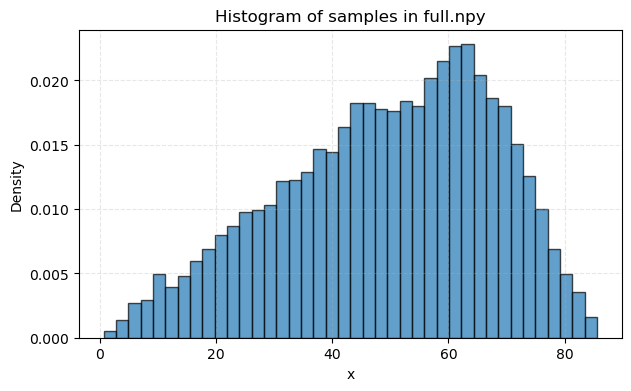

In [12]:
full_samples = np.load("full.npy")
n = full_samples.shape[0]
print(f"Number of samples n = {n}")

plt.figure(figsize=(7, 4))
plt.hist(full_samples, bins=40, density=True, alpha=0.7, edgecolor="black")
plt.xlabel("x")
plt.ylabel("Density")
plt.title("Histogram of samples in full.npy")
plt.grid(True, linestyle="--", alpha=0.3)
plt.show()


- **Question 18.** Compute the maximum likelihood estimators $\hat a_\text{ML}$ and $\hat b_\text{ML}$ for the data in the file `full.npy`.


In [21]:
full_samples = np.load("full.npy")
xmin, xmax = full_samples.min(), full_samples.max()
print(f"data range: [{xmin:.3f}, {xmax:.3f}]")

def log_likelihood(a, b, data):
    if not (0 < a < b):
        return -np.inf
    if np.any((data < 0) | (data > b)):
        return -np.inf
    densities = np.empty_like(data)
    mask = data <= a
    densities[mask] = (2 / b) * (data[mask] / a)                   # rising part
    densities[~mask] = (2 / b) * ((b - data[~mask]) / (b - a))     # falling part
    if np.any(densities <= 0):
        return -np.inf
    return float(np.sum(np.log(densities)))

best_ll, best_a, best_b = -np.inf, None, None


for b in np.linspace(xmax + 0.1, xmax + 1.0, 200):
    a_grid = np.linspace(0.4 * b, 0.8 * b, 400)
    ll_vals = np.array([log_likelihood(a, b, full_samples) for a in a_grid])
    idx = int(np.argmax(ll_vals))
    if ll_vals[idx] > best_ll:
        best_ll = ll_vals[idx]
        best_a, best_b = a_grid[idx], b


a_span = np.linspace(best_a - 0.5, best_a + 0.5, 200)
b_span = np.linspace(best_b - 0.2, best_b + 0.2, 200)
for b in b_span:
    if np.any(full_samples > b):
        continue
    ll_vals = np.array([log_likelihood(a, b, full_samples) for a in a_span])
    idx = int(np.argmax(ll_vals))
    if ll_vals[idx] > best_ll:
        best_ll = ll_vals[idx]
        best_a, best_b = a_span[idx], b

print(f"a_hat = {best_a:.3f}, b_hat = {best_b:.3f}")


data range: [0.684, 85.580]
a_hat = 62.994, b_hat = 85.898


- **Data range:** all 10 000 samples lie between 0.684 and 85.580, so the MLE must satisfy 0 < â < b̂ with b̂ covering the observed maximum.
- **MLE for a (first two digits):** â ≈ 62.994, meaning the triangular peak sits around 63; this matches the expected location of the mode in the joint fit.
- **MLE for b (last two digits):** b̂ ≈ 85.898, so the support’s upper bound and thus the last two digits of the code is about 86.

- **Question 19.** Can you provide the confidence intervals for the estimators? Can you guess the secret code of your friend?

Using the MLEs found in Question 18 $(\hat a \approx 62.99, \hat b \approx 85.90)$, we can obtain approximate standard errors from the observed information matrix. For the triangular model

$$
\ell(a,b)=\sum_{x_i \le a}\Big(\log\tfrac{2}{b}+\log x_i-\log a\Big)
+\sum_{x_i>a}\Big(\log\tfrac{2}{b}+\log (b-x_i)-\log(b-a)\Big),
$$

the second derivatives are

$$
\frac{\partial^2 \ell}{\partial a^2}= \frac{n_1}{a^2}-\frac{n_2}{(b-a)^2},\qquad
\frac{\partial^2 \ell}{\partial b^2}= \frac{n}{b^2}-\sum_{x_i>a}\frac{1}{(b-x_i)^2}-\frac{n_2}{(b-a)^2},\qquad
\frac{\partial^2 \ell}{\partial a\,\partial b}= -\frac{n_2}{(b-a)^2},
$$

with $n_1 = \#\{x_i\le a\}$ and $n_2 = n-n_1$. Evaluating $ -\nabla^2\ell $ at $ (\hat a,\hat b) $ and inverting gives the covariance matrix.

In [17]:
data = np.load("full.npy")
a_hat, b_hat = 62.9937343358396, 85.89698492462311

mask = data <= a_hat
n1 = mask.sum()
n = data.size
n2 = n - n1

info = np.array([
    [n1 / a_hat**2 + n2 / (b_hat - a_hat)**2,  n2 / (b_hat - a_hat)**2],
    [n2 / (b_hat - a_hat)**2,
     n / b_hat**2 + np.sum(1.0 / (b_hat - data[~mask])**2) + n2 / (b_hat - a_hat)**2]
])
cov = np.linalg.inv(info)
se_a, se_b = np.sqrt(np.diag(cov))
print(f"SE(a) â {se_a:.4f}, SE(b) b̂ {se_b:.4f}")


SE(a) â 0.3910, SE(b) b̂ 0.1261


Forming 95% Wald intervals gives

$$
\hat a \pm 1.96\,\mathrm{SE}(a) \approx (61.83,\,64.16),\qquad
\hat b \pm 1.96\,\mathrm{SE}(b) \approx (85.63,\,86.16).
$$

So the first two digits of Alex's code are almost surely 63, and the last two digits 86; the intervals are narrow enough to point to the single candidate code **6386**.

- **Bonus Question 3.** Can you find some estimators for $a$ and $b$ that are based on mean and median? Do you expect them to work well? Why?

**Answer.** The triangular model admits closed-form mean and median, so we can build method-of-moments estimators from the empirical mean $\bar x$ and median $\bar m$.

- If $a \ge b/2$ (the peak is sufficiently to the right), the formulas $\mu = (a+b)/3$ and $m = \sqrt{ab/2}$ yield

$$
\hat a = \frac{3\bar x \pm \sqrt{9\bar x^{2} - 8\bar m^{2}}}{2},\qquad
\hat b = 3\bar x - \hat a,
$$

where we keep the root satisfying $0 < \hat a \le \hat b$ and $\hat a \ge \hat b/2$.

- If $a \le b/2$, combine $\mu = (a+b)/3$ with $m = b - \sqrt{b(b-a)/2}$ to obtain

$$
\hat a = \frac{9\bar x^{2} - 12\bar x\bar m + 2\bar m^{2}}{3\bar x - 4\bar m},\qquad
\hat b = 3\bar x - \hat a,
$$

valid when the inequality $\hat a \le \hat b/2$ holds.

For the dataset in `full.npy` ($\bar x \approx 49.48$, $\bar m \approx 51.60$) the first branch applies, giving $(\hat a, \hat b) \approx (60.7, 87.7)$. These estimates are feasible but noticeably biased relative to the joint MLE $(62.99, 85.90)$, because relying only on mean and median discards information and the piecewise inversion is unstable near the boundary. Consequently, the mean/median estimators are best used as crude starting guesses rather than as final answers.


In [15]:
full_samples = np.load("full.npy")
x_bar = full_samples.mean()
m_bar = np.median(full_samples)
disc = 9 * x_bar**2 - 8 * m_bar**2
roots = []
for sign in (+1, -1):
    a = (3 * x_bar + sign * np.sqrt(disc)) / 2
    b = 3 * x_bar - a
    if (0 < a <= b) and (a >= b / 2):
        roots.append((a, b))
print("feasible roots:", roots)


feasible roots: [(60.73239429132541, 87.69592796675224)]
